### **Практикум 7. Галактики**

Практикум выполнен на основе материалов практического занятия\
в рамках ЛКШ, разработанного [Александром Нежиным](https://github.com/ZAKOVYIKA) и [Александром Ломакиным](https://github.com/teimy).

#### **О чем этот практикум?**

В рамках этого практикума мы будем работать с данными галактики [M59](https://ru.wikipedia.org/wiki/M_59_(%D0%B3%D0%B0%D0%BB%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0)),\
яркого примера эллиптической галактики. Одним из важнейших параметров галактики является её масса,\
и сегодня (и на следующей неделе) мы попробуем её оценить по наблюдаемым данным.

**На практикуме мы**:
1. Оценим угловые размеры эллиптической галактики фитированием.
2. Найдем профиль поверхностной яркости и фитируем его эмпирической моделью.
3. Оценим распределение дисперсии скоростей в галактике.
4. По полученным данным выведем зависимость массы от наблюдаемых параметров.
5. По полученным модельным зависимостям получим оценку на массу.

#### **Перед тем как начать.**

Убедимся, что все модули, которые нам нужны, установлены и работают как надо.

Если это не так, установите недостающие модули или обратитесь к преподавателю.

In [1]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
from matplotlib.patches import Ellipse

from astropy.io import fits
from astropy.wcs import WCS
from astropy import units as u

import pandas as pd

from scipy.integrate import quad
from scipy.optimize import minimize, curve_fit

#### **Часть 0. Читаем данные.**

В нашем анализе будут использоваться **два набора** данных:
- fits-файл с изображением галактики в оптике;
- txt-файл с дисперсией радиальных скоростей по спектральным данным.

**FITS-файл** содержит 2-D массив с числом отсчетов и заголовок с мета-данными.

К содержанию файла с дисперсиями радиальных скоростей мы вернемся позже.

In [2]:
filename = './data/M59/M59.fits'
data = fits.getdata(filename)
header = fits.getheader(filename)

data -- 2-D массив размера (313, 313), в котором хранятся данные о числе отсчетов\
зарегистрированных с конкретного направления.

header -- именованный массив различных мета-данных об объекте, формате данных и т.д.

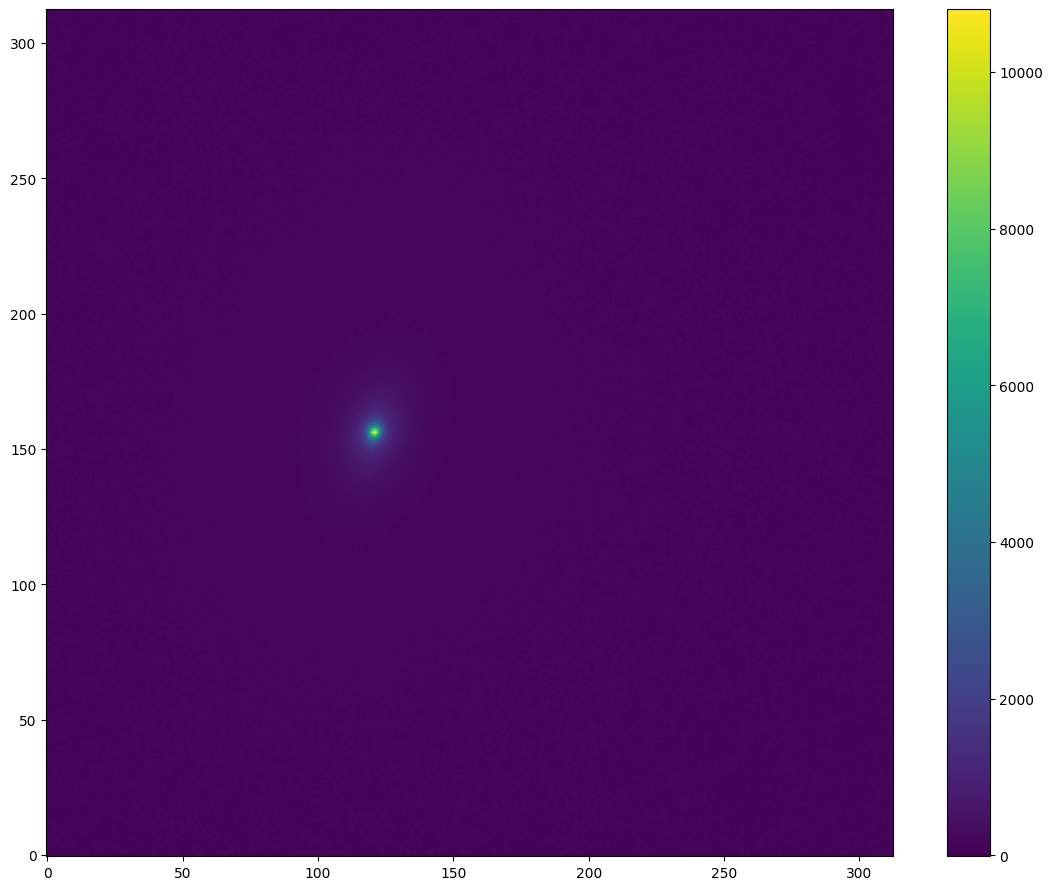

In [3]:
plt.close()
plt.figure(figsize=(14, 11))

plt.imshow(data, origin='lower') # функция для рисования изображений по массивам
                                 # origin='lower' помещает точку (0,0) в левый нижний угол
plt.colorbar()

plt.show()

Просмотреть содержимое header можно прописав через отображение Jupyter-notebook, указав переменную\
типа header в конце ячейки кода.

In [4]:
header

SIMPLE  =                    T                                                  
BITPIX  =                   16                                                  
NAXIS   =                    2                                                  
NAXIS1  =                  313                                                  
NAXIS2  =                  313                                                  
OBJECT  = 'NGC 4621  '                                                          
BSCALE  =         1.000000E+00                                                  
BZERO   =         0.000000E+00                                                  
EXPOSURE=         2.000000E+02                                                  
RA      = '12:41:26.2'                                                          
DEC     = '+11:42:53 '                                                          
TIME    = '08:39:49  '                                                          
AIRMASS =         1.130000E+

Обращение к отдельным значениям происходит по ключевым словам вместо индексов:

In [5]:
header['TELESCOP']

'Lowell 1.1'

#### **Часть 1. Первичная обработка изображения.**

В этой части мы попробуем получить базовые данные о наблюдаемых свойствах\
галактики, используя только данное изображение M59.

> *__Задание 1.0. Строим картинку.__*\
Для начала еще раз построим изображение нашего наблюдения, но уже\
в логарифмическом масштабе.

Для этого используем `plt.imshow` с дополнительным аргументов `norm=LogNorm()`,\
`LogNorm()` -- функция, которую мы импортировали из `matplotlib` ранее.

<details>
<summary><b>
>>> Вариант решения (кликни, чтобы раскрыть) <<<
</summary></b>

```python
plt.close()

plt.imshow(data, origin='lower', norm=LogNorm())
plt.colorbar()

plt.show()
```

</details>


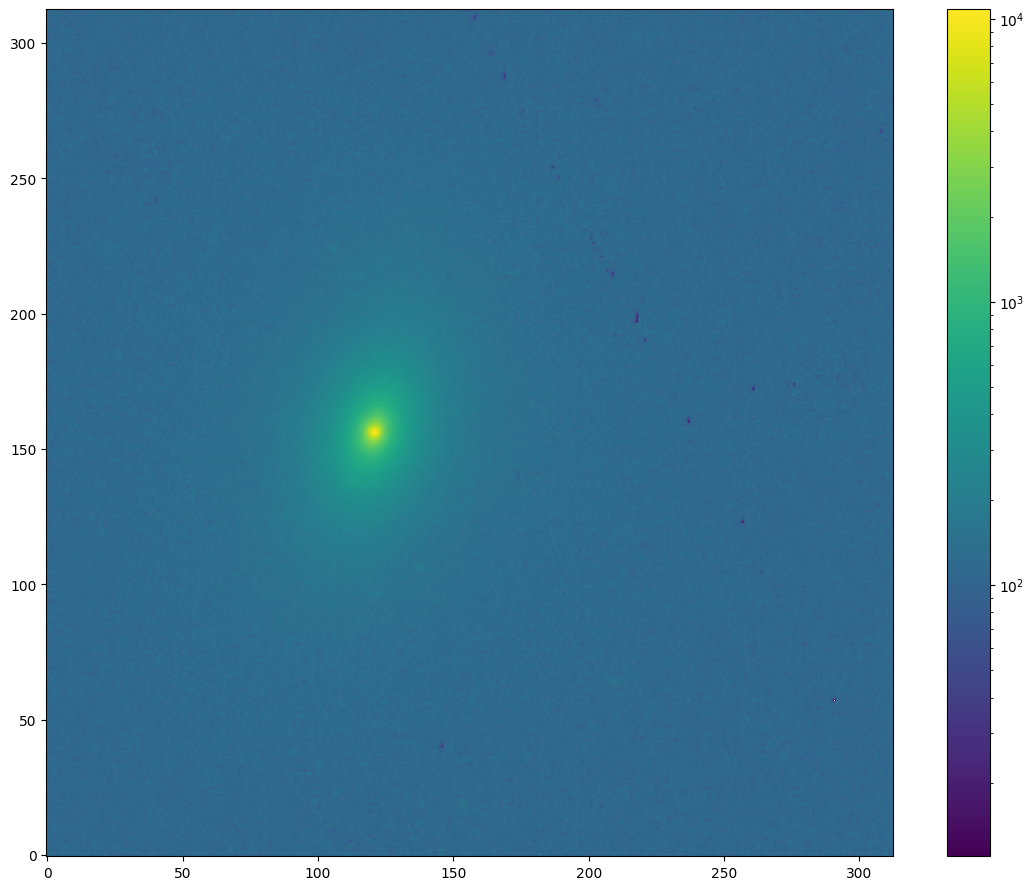

In [4]:
# =======================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

plt.close()
plt.figure(figsize=(14, 11))

plt.imshow(data, origin='lower', norm=LogNorm()) # функция для рисования изображений по массивам
                                 # origin='lower' помещает точку (0,0) в левый нижний угол
plt.colorbar()

plt.show()


> *__Задание 1.1. Ищем максимум.__*\
Максимум излучения на изображении, как хорошо видно, приходится на центр\
эллиптической галактики. Напишите код, который определяет положение точки\
с максимальным числом отсчетов в нашем массиве.\
**Запишите** их в переменные `x_center` и `y_center`.\
**Нарисуйте** положение этого центра на графике для самопроверки.

Подсказка:\
Попробуйте воспользоваться функциями типа `np.argmax`, `np.max` 

<details>
<summary>
<b> >>> Вариант решения <<<</b>
</summary>

```python Решение
    x_center = data.argmax() % data.shape[1]
    y_center = data.argmax() // data.shape[0]
```

</details>

In [ ]:
x_center = data.argmax() % data.shape[1]
y_center = data.argmax() // data.shape[0]

313

<details>
<summary>
<b> >>> Вариант решения <<<</b>
</summary>

```python Решение
    plt.close()

    plt.imshow(data, origin='lower', norm=LogNorm())
    plt.scatter(x_center, y_center, color='black')

    plt.show()
```

</details>

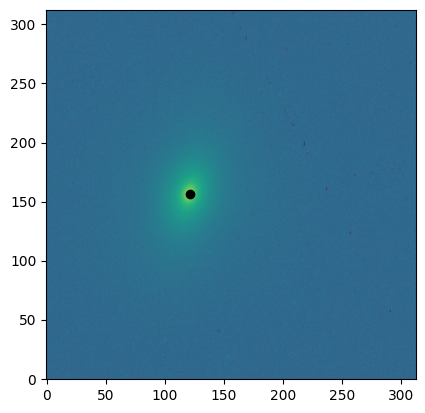

In [16]:
plt.close()

plt.imshow(data, origin='lower', norm=LogNorm())
plt.scatter(x_center, y_center, color='black')

plt.show()

В рамках этого практикума мы будем описывать форму наблюдаемой эллиптической\
галактики эллипсом (sic!).

Для простоты отображения будем использовать специально написанную функцию `draw_ellipse()`.\
Она **принимает**:\
`x_center`, `y_center` - координаты центра эллипса\
`a`, `b` - полуоси эллипса\
`angle` - угол поворота эллипса **в градусах**.

In [18]:
def draw_ellipse(x_center, y_center, a, b, angle):
    width, height = a*2, b*2
    plt.scatter(x_center, y_center, c='black')
    plt.gca().add_patch(Ellipse((x_center, y_center), width=width, height=height, angle=angle, facecolor='None', edgecolor='black'))
    plt.gca().add_patch(Ellipse((x_center, y_center), width=width, height=0, angle=angle, facecolor='None', edgecolor='black', alpha=0.5))
    plt.gca().add_patch(Ellipse((x_center, y_center), width=0, height=height, angle=angle, facecolor='None', edgecolor='black', alpha=0.5))

> **_Интерлюдия 1._**\
В коде ниже в явном виде заданы все параметры функции `draw_ellipse()`.\
Я предлагаю с ними поиграться и разобраться, что за что отвечает.

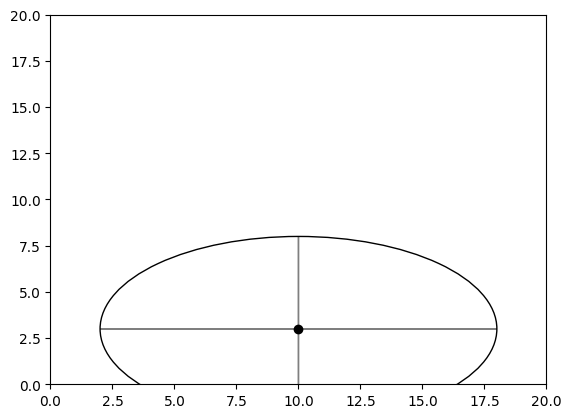

In [35]:
plt.close()

draw_ellipse(x_center=10, y_center=3, a=8, b=5, angle=0)
plt.xlim(0, 20)
plt.ylim(0, 20)

plt.show()

> **_Задание 1.2. Фитируем на глазок._**\
Постройте изображение галактики и эллипс в одних осях.\
Подберите параметры эллипса `a`, `b` и `angle`, которые будут\
(на глаз), неплохо описывать границы галактики.

Не переусердствуйте, эти значения будут использоваться только как\
нулевое приближение при дальнейшем фитировании.

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python

plt.close()
plt.figure(figsize=(14, 11))

plt.imshow(data, origin='lower', norm=LogNorm())
plt.colorbar()

draw_ellipse(x_center, y_center, 30, 60, -15)


plt.show()

```
</details>

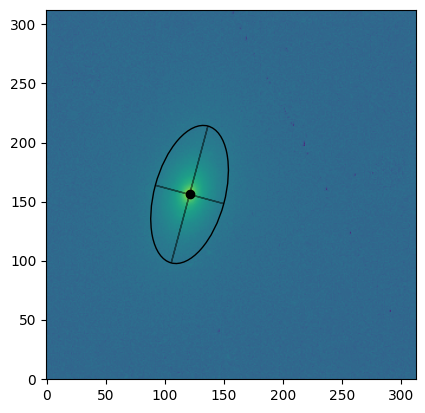

In [61]:
plt.close()

plt.imshow(data, origin='lower', norm=LogNorm())
draw_ellipse(x_center, y_center, a=30, b=60, angle=-15)

plt.show()

#### **Часть 2. Фитирование эллипса.**

В этом разделе мы попробуем оптимизировать поиск параметров эллипса,\
который наилучшим образом опишет наши данные.

**Что сделаем**:
1. Определим условие для поиска границ эллипса.
2. Зададим метрику соответствия эллипса и данных.
3. Напишем функцию для фитирования.
4. Получим оптимальные параметры эллипса

В наших данных на изображении присутствуют две ключевые компоненты:\
излучение от галактики и фон от неба. Излучение от галактики маскимально\
в центре и постепенно убывает к краям, пока не станет совсем незначительным\
по сравнению с фоном от неба.

В таком случае, мы можем для нашей картинки подобрать такой диапазон значений\
числа отсчетов в каждом пикселе, при котором мы будем видеть только пограничную область:\
больше, чем излучение от неба, но меньше, чем излучение центральной области галактики.

Оценку границ этой области удобно при помощи гистограммы числа отсчетов в нашем изображении.

> **_Задание 2.0_**\
Подберите такие значения границ `bor_min` и `bor_max` , которые лежат выше основного пика фона,\
но ниже большей части хвоста распределения, ответственного за излучение галактики.

Обратите внимание, что в коде ниже есть переменная `header["SKY"]`, так в мета-данных помещена\
оценка числа отсчетов, пришедших с неба. Сейчас это нам не нужно, но пригодится позже.

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

Я использовал значения

```python
bor_min = 150
bor_max = 170
```

но в рамках этого задания приемлемый диапазон может варьироваться

</details>

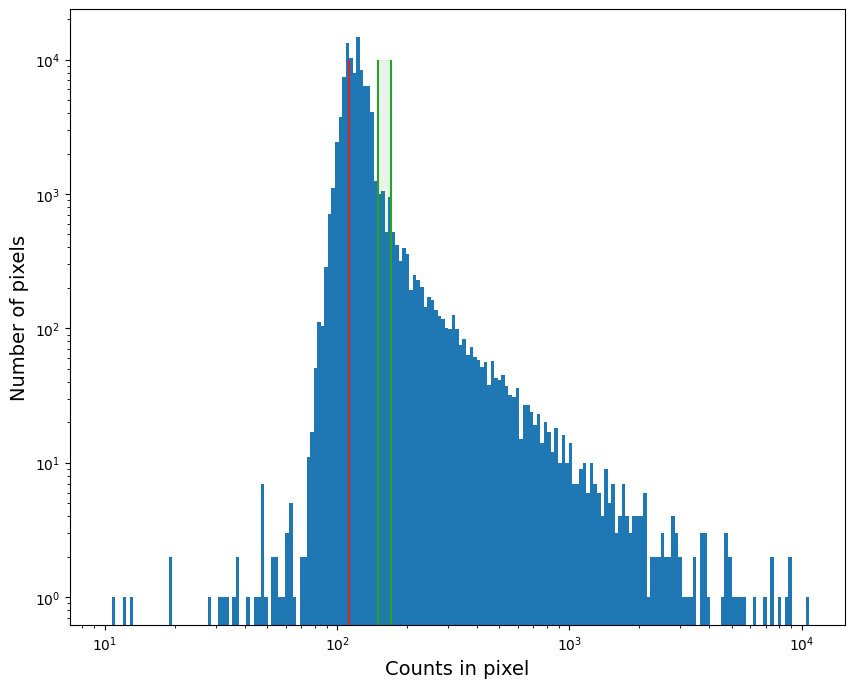

In [70]:
# =======================================
# Место для ваших значений

bor_min = 150
bor_max = 170

# =======================================

bins = np.geomspace(10, data.max(), 200)

plt.close()
plt.figure(figsize=(10, 8))

plt.hist(data.flatten(), bins=bins, histtype='stepfilled')
plt.vlines(header['SKY'], 0, 1e4, colors='tab:red', label='SKY estimation')

plt.fill_betweenx(np.array([0, 1e4]), bor_min, bor_max, color='tab:green', alpha=0.1)
plt.vlines([bor_min, bor_max], 0, 1e4, color='tab:green')

plt.xscale('log')
plt.yscale('log')

plt.ylabel('Number of pixels', fontdict={'size':14})
plt.xlabel('Counts in pixel', fontdict={'size':14})

plt.show()

> **_Интерлюдия 2. Парни, шо мы надрафтили_**\
Провалидируем, что наш диапазон значений возвращает точки, которые нам подходят.\
Построим в одних осях изображение наших данных **с вычтенным фоном** и точки,\
которые мы классифицируем как границы.\
Я предлагаю разобраться, что делает первая строчка в этой ячейке.

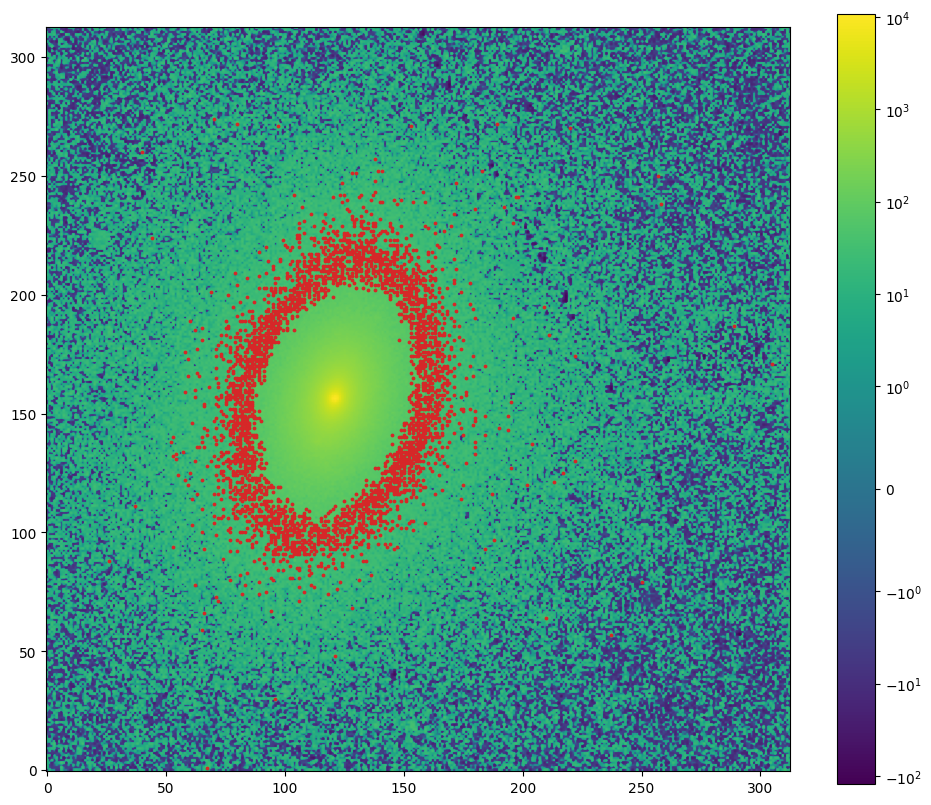

In [71]:
y_border, x_border = np.where((data > bor_min) * (data < bor_max))

plt.close()

plt.figure(figsize=(12, 10))

plt.imshow(data - header['SKY'], norm=SymLogNorm(1), origin='lower')
plt.colorbar()

plt.scatter(x_border, y_border, s=3, color='tab:red')


plt.show()


> *Задание 2.1. Изобретаем колесо (эллипс).*\
Напишите функцию, которая отражает, насколько хорошо массив\
точек описывается заданным уравнением эллипса.

Функция **принимает**:\
x - массив координат точек по оси x\
y - массив координат точек по оси y\
x_center, y_center - координаты центра эллипса\
a, b - длины полуосей эллипса\
angle - угол поворота эллипса **в градусах**

И **возвращает**:\
абсолютную метрику близости каждой точки к эллипсу.

**Как это сделать?**
1. Перевести градусы в радианы при помощи модуля `astropy.units`/
Он уже импортирован в проект как `u`.\
Это делается при помощи синтаксиса `(my_number * u.some_unit).to(u.other_unit).value`
2. Сдвинуть все точки в СО с нулем в центре эллипса `(x_center, y_center)`.
3. Повернуть все точки на угол `angle` матрицей поворота.
4. Вычислить близость к эллипсу по формуле:\
$\rm
Metric = (x_*^2 / a^2 + y_*^2/b^2) - 1
$\
$x_*$ и $y_*$ -- положения точек после прошлых преобразований.\
Эта формула взята из стандартного уравнения эллипса и в идеальном\
случае должна возвращать 0.

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python
def ellipse(x, y, x0, y0, a, b, angle):
    angle = (angle * u.deg).to(u.rad).value
    x_p = (x - x0)*np.cos(angle) + (y-y0)*np.sin(angle)
    y_p = -(x - x0)*np.sin(angle) + (y-y0)*np.cos(angle)
    
    return (x_p**2/a**2 + y_p**2/b**2) - 1
```

</details>

In [76]:
# ==================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

def ellipse(x, y, x0, y0, a, b, angle):
   pi_angle =  (angle * u.deg).to(u.rad).value
   x_new = (x - x0)*np.cos(pi_angle) + (y-y0)*np.sin(pi_angle)
   y_new = -(x - x0)*np.sin(pi_angle) + (y-y0)*np.cos(pi_angle)

   Metric = ((x_new / a) ** 2 + (y_new / b) ** 2) - 1
    
   return Metric

ellipse(x_border, y_border, x_center, y_center, a = 30, b = 60, angle = 15 )


array([13.57947351,  6.26829718,  2.89111654, ...,  3.28120175,
       11.65524874,  3.88235876])

> **_Интерлюдия 3. Я точно все нормально делаю?_**\
Для самопроверки снова построим график с точками на границе, но в этот раз\
модифицируем его цвет при помощи аргумента `plt.scatter(..., c=ellipse(...), ...)`.\
Белым на графике отмечаются те точки, что наша функция считаем близкими к нулю,\
красным - те, что больше нуля, и синим - те, что меньше нуля.\
Я предлагаю проверить, что все рисуется так, как мы ожидаем, и что в коде выше не\
допущено никаких ошибок.

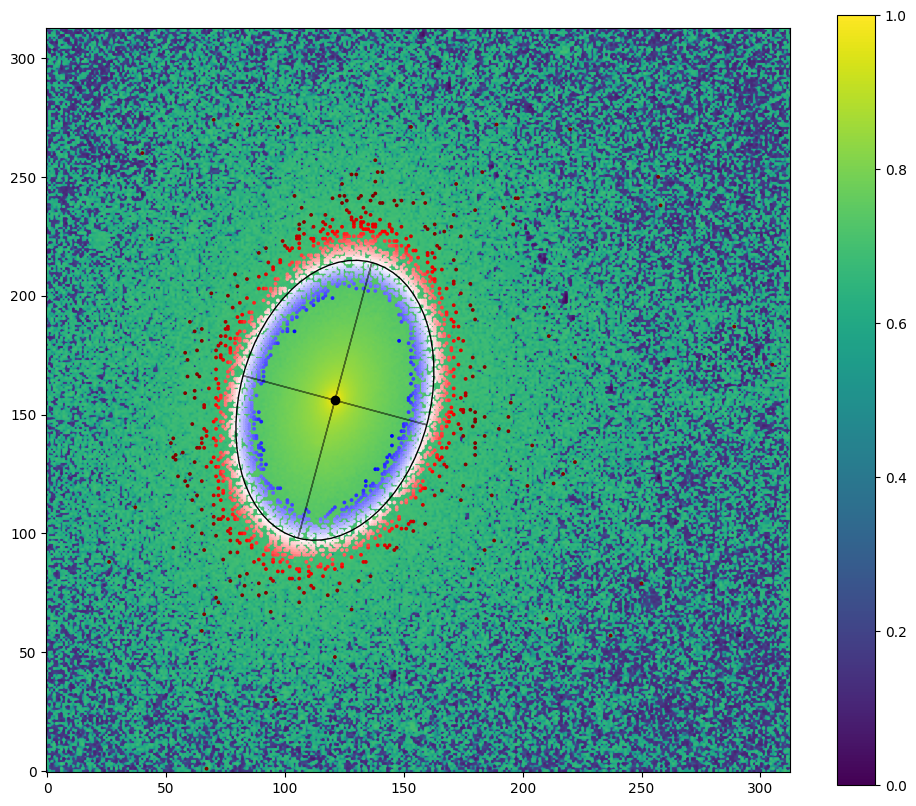

In [82]:
# ============================================
# Модифицируйте эти значения, чтобы поиграться и проверить, что все работает

a, b, angle = 40, 60, -15

# ============================================

plt.close()

plt.figure(figsize=(12, 10))

plt.imshow(data - header['SKY'], norm=SymLogNorm(1), origin='lower')

plt.scatter(x_border, y_border, s=3, c=ellipse(x_border, y_border, x_center, y_center, a, b, angle), cmap='seismic', vmax=1, vmin=-1)
draw_ellipse(x_center, y_center, a, b, angle)

plt.colorbar()


plt.show()

> **_Задание 2.2. Я ненавижу `scipy.optimize`_**\
Напишите функцию optim_func(), которая будет передаваться в\
функцию модуля `optimize.minimize` для решения задачи оптимизации.

Первый аргумент функции **должен** быть списком минимизируемых параметров.
Возвращать эта функция должна сумму абсолютных значений функции `ellipse`\
с параметрами, заданными в params и при помощи дополнительных аргументов.

Дополнительные аргументы, которые нужно передать в функцию:\
`x_border`, `y_border`, `x_center`, `y_center`.

<details>

<summary><b>
>>> Вариант решения <<<
</summary></b>

```python

def optim_func(params, x_border, y_border, x_center, y_center):
    a, b, angle = params

    return np.sum(np.abs(ellipse(x_border, y_border, x_center, y_center, a, b, angle)))

```

</details>

In [83]:
# ==============================================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

def optim_func(params, x_border, y_border, x_center, y_center):
    a, b, angle = params

    return np.sum(np.abs(ellipse(x_border, y_border, x_center, y_center, a, b, angle)))

> **_Интерлюдия 4. Вызываю огонь на себя_**\
В блоке кода ниже вам необходимо дописать вызов функции `minimize`.\
Я предлагаю попробовать это сделать самостоятельно, но не стесняйтесь\
скопировать решение под спойлером ниже, возиться с синтаксисом слишком долго не наша цель.\
Также проверьте, что картинка, которая получается, выглядит разумно.

P.S. Имейте в виду, что эта реализация в коде точно будет работать только для моего же решения\
прошлого пункта 

<details>

<summary><b>
>>> Вариант решения <<<
</summary></b>

```python

opt_a, opt_b, opt_angle = minimize(optim_func, [a, b, angle], args=(x_border, y_border, x_center, y_center)).x

```

</details>

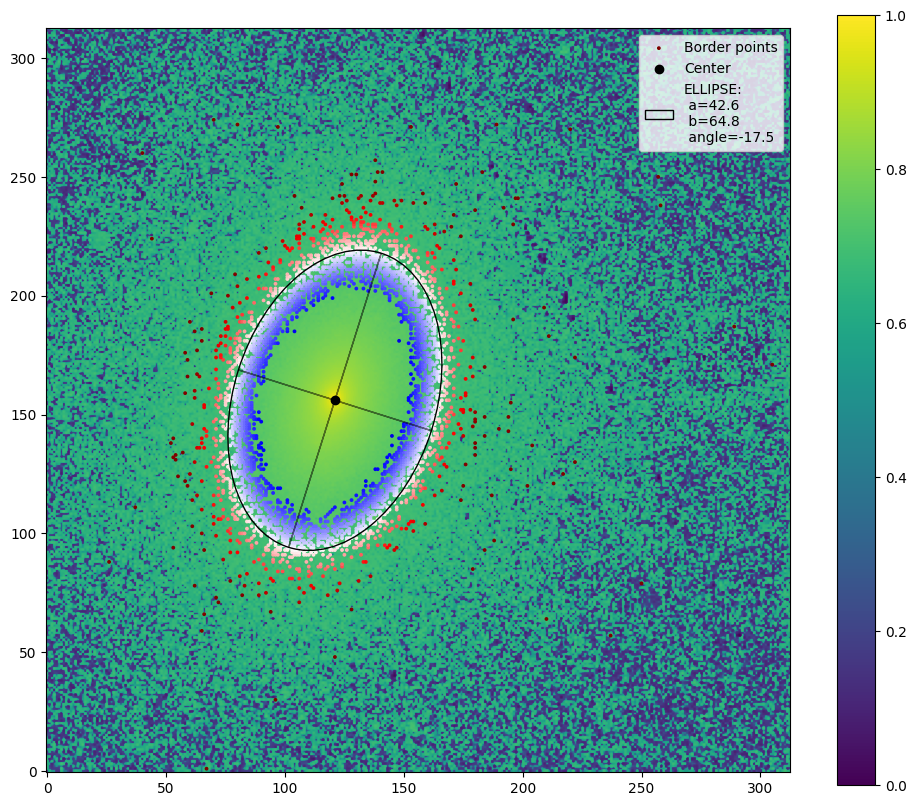

In [87]:
# =============================================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

opt_a, opt_b, opt_angle = minimize(optim_func, [a, b, angle], args=(x_border, y_border, x_center, y_center)).x

# =============================================================

plt.close()

plt.figure(figsize=(12, 10))

plt.imshow(data - header['SKY'], norm=SymLogNorm(1), origin='lower')
# draw_ellipse(x_center, y_center, width, height, angle)
plt.scatter(x_border, y_border, s=3, c=ellipse(x_border, y_border, x_center, y_center, opt_a, opt_b, opt_angle), cmap='seismic', vmax=1, vmin=-1)
# draw_ellipse(x_center, y_center, width, height, angle)
draw_ellipse(x_center, y_center, opt_a, opt_b, opt_angle)

plt.colorbar()

plt.legend(['Border points', 'Center', f'ELLIPSE:\n a={opt_a:.1f}\n b={opt_b:.1f}\n angle={opt_angle:.1f}'])

plt.show()

> **_Задание 2.3. Промежуточный научный результат._**\
Для подведения итога к этой части практикума получим один физический результат.\
В 1926 году Эдвин Хаббл (тот [самый](https://ru.wikipedia.org/wiki/%D0%A5%D0%B0%D0%B1%D0%B1%D0%BB,_%D0%AD%D0%B4%D0%B2%D0%B8%D0%BD)) предложил [систему классификации](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%80%D1%84%D0%BE%D0%BB%D0%BE%D0%B3%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%B3%D0%B0%D0%BB%D0%B0%D0%BA%D1%82%D0%B8%D0%BA#%D0%9A%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F_%D0%A5%D0%B0%D0%B1%D0%B1%D0%BB%D0%B0) галактик\
на эллиптические, линзовидные, спиральные и неправильные.\
В рамках этого задания вам необходимо вычислить показатель эллиптичности нашей галактики\
по оценке размеров её полуосей и сделать вывод о её классе.

**Эллиптичность** галактики вычисляется по формуле:

$N = 10\times(1 - b/a)$

, где `a`,`b` - большая и малая полуоси соответственно.\
Обратите внимание, что в нашем случае большая полуось может быть записана в переменную b и наоборот.

Классификация эллиптической галактики имеет вид E0-E7, где число - это показатель эллиптичности,\
округленный вниз.

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```
print(10 * (1 - min(opt_a, opt_b) / max(opt_a, opt_b)))
```

В литературе я встретил разброс классификаций от E3 до E7, но наиболее свежие\
статьи все-таки указывают на **E3-E5**.

</details>

In [91]:
# =============================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

N = 10 * (1 - min(opt_a, opt_b) / max(opt_b, opt_a))

print(N)

3.438468149639241


#### **_Часть 3. Радиальный профиль и профиль Серсика._**
Для дальнейшей работы нам хочется описать наблюдаемые данные какой-то\
аналитической функцией, чтобы потом выполнить немного зубодробительного интегрирования.

Объект нашего анализа этого раздела - радиальный профиль излучения галактики и его описание\
феноменологической моделью Серсика.

Для получения оценки на параметры этой модели применимо к нашим данным **нам нужно**:
1. Ограничить область для извлечения радиального профиля.
2. Удалить влияние фона из оставшихся данных.
3. Получить радиальный профиль.
4. Фитировать его известной моделью.

Для начала создадим копию массива с данными для дальнейшей модификации.

In [113]:
data_filtered = data.copy().astype(float)

data_filtered

array([[108., 125., 114., ..., 143., 124., 124.],
       [123., 112., 108., ..., 125.,  98., 108.],
       [127., 111., 104., ..., 122., 121., 118.],
       ...,
       [120., 102., 121., ..., 102., 131., 109.],
       [107., 109., 109., ..., 105., 126., 112.],
       [115., 113., 132., ..., 138., 122., 109.]])

> **_Задание 3.0. Фильтруем фон._**
В этом задании вам необходимо:
1. Создать двумерный массив координат каждого пикселя X, Y при помощи [`np.meshgrid`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
2. Написать при помощи функции `ellipse` условие на нахождение точки вне эллипса.
3. Заполнить все элементы массива `data_filtered` вне эллипса значениями `np.nan`

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python
Y, X = np.meshgrid(np.arange(data.shape[0]), np.arange(data.shape[1]))

mask_out_ellipse = ellipse(X, Y, x_center, y_center, opt_a, opt_b, opt_angle) > 1.

data_filtered[mask_out_ellipse] = np.nan
```

В литературе я встретил разброс классификаций от E3 до E7, но наиболее свежие\
статьи все-таки указывают на **E3-E5**.

</details>

In [ ]:
# =============================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

Y, X = np.meshgrid(np.arange(data_filtered.shape[0]), np.arange(data_filtered.shape[1]))

mask_out_ellipse = ellipse(X, Y, x_center, y_center, opt_a, opt_b, opt_angle) > 1

data_filtered[mask_out_ellipse] = np.nan






array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

> **_Задание 3.1. Удаляем фон._**\
Теперь из каждого оставшегося элемента массива вычтем значение `header["SKY"]`

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python
data_filtered = data_filtered - header['SKY']
```

</details>

In [116]:
# =============================================
# МЕСТО ДЛЯ ВАШЕГО КОДА

data_filtered_without_sky = data_filtered - header['SKY']

Убедимся, что осталось то, что должно было.

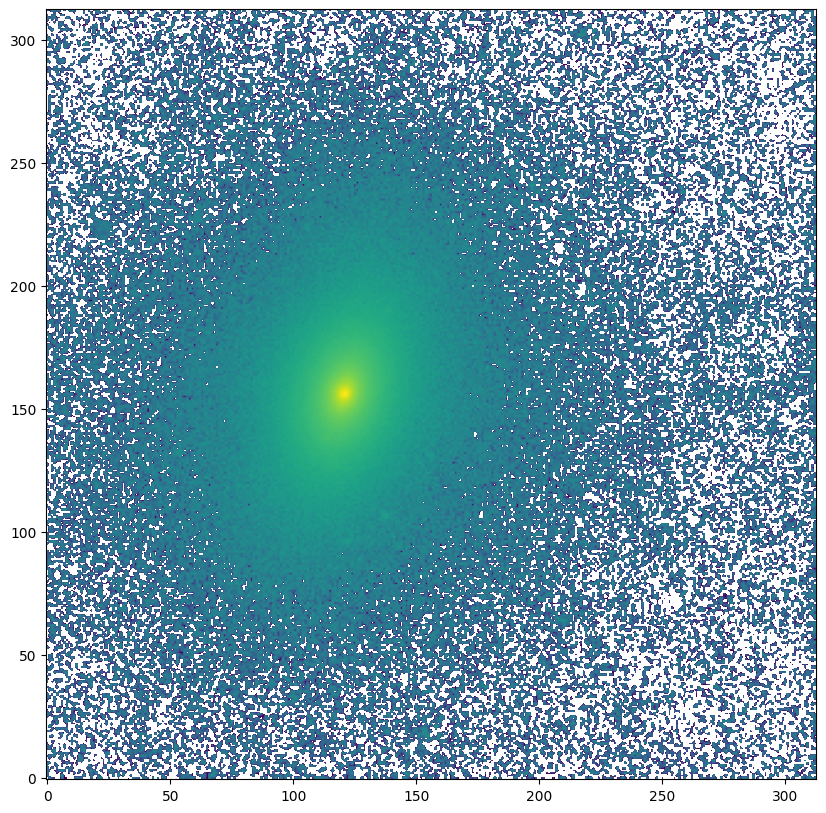

In [118]:
plt.close()
plt.figure(figsize=(10, 10))

plt.imshow(data_filtered_without_sky, origin='lower', norm=LogNorm())

plt.show()

> **_Интерлюдия 5. Размерности важны._**\
В ячейке ниже инициализированы две переменные:\
`pix2arcsec` - переводной коэффициент из пикселей в угловые секунды (арксеки) для данных\
`distance` - массив, который каждому пикселю ставит в соответствие расстояние до него\
в арксеках от центра эллипса.\
Я предлагаю разобраться, как работает код, который позволяет получить расстояния.

In [119]:
pix2arcsec = (header['CDELT2'] * u.deg).to(u.arcsec).value

distance = ((X - x_center) ** 2 + (Y - y_center) ** 2) ** 0.5 * pix2arcsec

Убедимся, что дистанции (помеченные черным контуром), вычисляются корректно.

In [ ]:
plt.close()
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)

plt.imshow(data_filtered, origin='lower', norm=LogNorm())
cont = plt.contour(distance, origin='lower', colors='black')
plt.clabel(cont)

plt.subplot(1, 2, 2)

plt.scatter(distance, data_filtered, s=3)

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Distance, arcsec')
plt.ylabel('Counts')

plt.show()


> **_Задание 3.2. Радиальный профиль._**\
Вам необходимо дополнить код внутри цикла для того,\
чтобы вычислить среднее значение и среднеквадратичное отклонение\
числа отсчетов в небольших кольцах вокруг центра эллипса.

<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python
distance_grid = np.geomspace(1, 100, 30)

counts = np.zeros(len(distance_grid) - 1)
counts_std = np.zeros(len(distance_grid) - 1)

for idx in range(len(distance_grid)-1):

#=============================================================
# МЕСТО ДЛЯ ВАШЕГО КОДА
    curr_data = data_filtered[(distance >= distance_grid[idx]/pix2arcsec) * (distance < distance_grid[idx+1]/pix2arcsec)]
    counts[idx] = curr_data.mean() 
    counts_std[idx] = curr_data.std()

#=============================================================
distances = (distance_grid[1:] + distance_grid[:-1])/2

distances = distances[~np.isnan(counts)]
counts_std = counts_std[~np.isnan(counts)]
counts = counts[~np.isnan(counts)]
```

</details>

In [ ]:
distance_grid = np.geomspace(1, 90, 30)

counts = np.zeros(len(distance_grid) - 1)
counts_std = np.zeros(len(distance_grid) - 1)

for idx in range(len(distance_grid)-1):

#=============================================================
# МЕСТО ДЛЯ ВАШЕГО КОДА




#=============================================================
distances = (distance_grid[1:] + distance_grid[:-1])/2

distances = distances[~np.isnan(counts)]
counts_std = counts_std[~np.isnan(counts)]
counts = counts[~np.isnan(counts)]

> **_Задание 3.3. Графики наше все._**\
Постройте график полученного радиального профиля с ошибками.\
Обратите внимание, что предыдущий график изображался в log-log масштабе.


<details>
<summary><b>
>>> Вариант решения <<<
</summary></b>

```python

plt.close()
plt.figure(figsize=(10, 10))

plt.scatter(distance, data_filtered, s=3, label='Raw points')
plt.errorbar(distances, counts, counts_std, 0, color='black', fmt='.', label='Radial profile')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Distance, arcsec')
plt.ylabel('Counts')

plt.legend()

plt.show()
```

</details>

In [ ]:
# =========================================
# МЕСТО ДЛЯ ВАШЕГО КОДА




> **_Интерлюдия 6. Снова проклятое фитирование._**\
В блоке кода ниже приведен феноменологический [профиль Серсика](https://en.wikipedia.org/wiki/S%C3%A9rsic_profile),\
которым фитируются радиальные профили. Мы не будем снова ковыряться с новой функцией для фита [`curve_fit`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html),\
но обратите внимание, что она отличается от ранее использованного `minimize`.

Профиль Серсика содержит 3 свободных параметра, про которые можно подробнее почитать по ссылке выше.

In [ ]:
def sers(R, I_e, n, R_half):
    return I_e * np.exp(-(2*n - 1./3 + 4./(405*n) + 46./(25515*n**2) + \
                          131./(1148175*n**3)- 2194697./(30690717750*n**4))*((R/R_half)**(1/n) - 1) )
# наша функция Серсика

kd, cov = curve_fit(sers, distances, counts, p0=[10, 3, 40], sigma=counts_std, absolute_sigma=True)
I_e, n, R_half = kd

Убедимся, что все фитируется как надо.

In [ ]:
plt.close()
plt.figure(figsize=(10, 10))

plt.scatter(distance, data_filtered, s=3, label='Raw points')
plt.errorbar(distances, counts, counts_std, 0, color='black', fmt='.', label='Radial profile')

x_sers = np.geomspace(1, 100, 1000)
plt.plot(x_sers, sers(x_sers, I_e, n, R_half), color='red', label='Sersic profile')

plt.xscale('log')
plt.yscale('log')

plt.xlabel('Distance, arcsec')
plt.ylabel('Counts')

plt.legend()

plt.show()

#### **_Часть 4. Дисперсия радиальных скоростей и финал наших страданий._**

Мы получили модель, которая неплохо описывает радиальный профиль излучения галактики,\
теперь все, что нам нужно для оценки массы - это профиль дисперсии скоростей.

Этот практикум рассчитан на 2 занятия, поэтому, если вы дошли сюда на первом, вы молодцы, но больше\
тут еще ничего нет. Приходите на следующей неделе для теоретической справки и окончания нашей работы.